In [76]:
import pandas as pd
data1 = pd.read_csv('./01_제공데이터_update(210811)/01_음식물쓰레기_FOOD_WASTE_210811_update.csv', encoding='cp949')
data5 = pd.read_csv('./01_제공데이터_update(210811)/03_거주인구_RESIDENT_POP.csv', encoding='cp949')


/home/duhyeong.lee/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib as mpl

print(mpl.matplotlib_fname())
print(mpl.get_cachedir())
print(mpl.rcParams['font.family'])
print(mpl.rcParams['font.size'])
mpl.rcParams['font.family'] = 'NanumBarunGothic'
mpl.rcParams['font.size'] = 8

/home/duhyeong.lee/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc
/home/duhyeong.lee/.cache/matplotlib
['sans-serif']
10.0


In [90]:
data5

,base_year,base_month,city,emd_cd,emd_nm,sex,resid_reg_pop,foreign_pop,total_pop
0,2018,1,제주시,50110590,건입동,남성,5085,146,5231
1,2018,1,제주시,50110590,건입동,여성,4715,82,4797
2,2018,1,제주시,50110256,구좌읍,남성,7965,368,8333
3,2018,1,제주시,50110256,구좌읍,여성,7609,184,7793
4,2018,1,서귀포시,50130253,남원읍,남성,9806,428,10234
...,...,...,...,...,...,...,...,...,...
3607,2021,6,제주시,50110250,한림읍,여성,10341,1140,11481
3608,2021,6,제주시,50110600,화북동,남성,12062,169,12231
3609,2021,6,제주시,50110600,화북동,여성,12238,161,12399
3610,2021,6,서귀포시,50130550,효돈동,남성,2660,39,2699


In [55]:
temp5 = data5.copy()
temp5['base_year'] = temp5['base_year'].astype(str)
temp5['base_month'] = temp5['base_month'].astype(str)
def p_zero(x):
    if len(x)==1:
        return '0' + str(x)
    else:
        return str(x)

In [57]:
temp5['base_month']=temp5['base_month'].apply(lambda x: p_zero(x))

In [64]:
temp5['year_month'] = temp5['base_year'] + '-' + temp5['base_month']

In [67]:
temp5 = temp5.groupby(['emd_nm', 'year_month', 'sex']).sum().reset_index()

In [68]:
temp5

,emd_nm,year_month,sex,emd_cd,resid_reg_pop,foreign_pop,total_pop
0,건입동,2018-01,남성,50110590,5085,146,5231
1,건입동,2018-01,여성,50110590,4715,82,4797
2,건입동,2018-02,남성,50110590,5090,142,5232
3,건입동,2018-02,여성,50110590,4724,82,4806
4,건입동,2018-03,남성,50110590,5072,141,5213
...,...,...,...,...,...,...,...
3607,효돈동,2021-04,여성,50130550,2607,19,2626
3608,효돈동,2021-05,남성,50130550,2661,41,2702
3609,효돈동,2021-05,여성,50130550,2605,19,2624
3610,효돈동,2021-06,남성,50130550,2660,39,2699


In [70]:
def get_year_month(x):
    return x[0:7]
data1['year_month'] = data1['base_date'].apply(lambda x: get_year_month(x))
temp1 = data1.copy()
temp1 = temp1.groupby(['emd_nm', 'year_month']).sum().reset_index()
temp1

,emd_nm,year_month,em_cnt,em_g,pay_amt
0,건입동,2018-01,18416,45646550,1364804
1,건입동,2018-02,17491,42953550,1284216
2,건입동,2018-03,19396,46422450,1387853
3,건입동,2018-04,19179,42438700,1268331
4,건입동,2018-05,21277,44893300,1341494
...,...,...,...,...,...
1661,효돈동,2021-02,6795,26128400,782163
1662,효돈동,2021-03,7492,26845400,803505
1663,효돈동,2021-04,7399,25200200,754194
1664,효돈동,2021-05,6682,21724850,650080


  0%|          | 0/43 [00:00<?, ?it/s]

애월읍


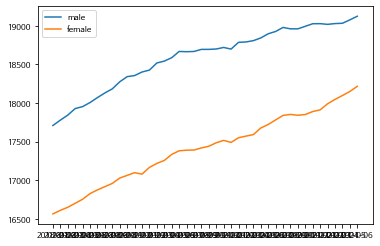

  2%|▏         | 1/43 [00:00<00:14,  2.81it/s]

효돈동


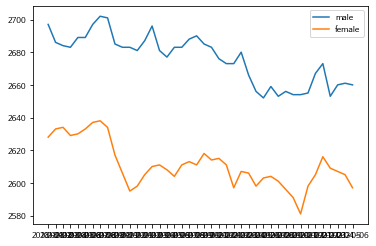

  5%|▍         | 2/43 [00:00<00:19,  2.11it/s]

우도면


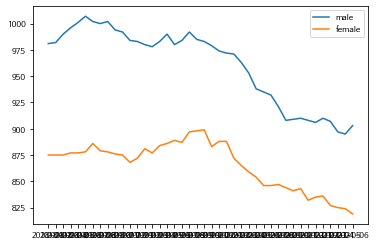

  7%|▋         | 3/43 [00:01<00:18,  2.19it/s]

한경면


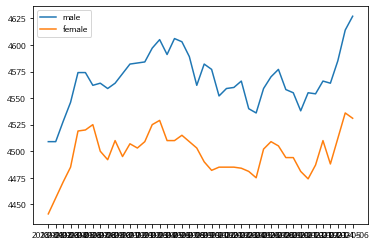

  9%|▉         | 4/43 [00:01<00:17,  2.21it/s]

구좌읍


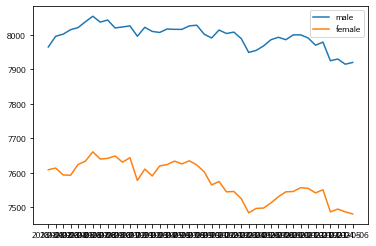

 12%|█▏        | 5/43 [00:02<00:15,  2.48it/s]

노형동


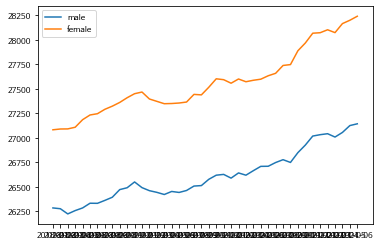

 14%|█▍        | 6/43 [00:02<00:15,  2.39it/s]

대천동


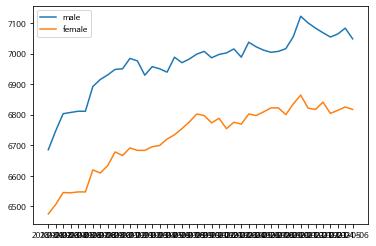

 16%|█▋        | 7/43 [00:02<00:15,  2.36it/s]

용담1동


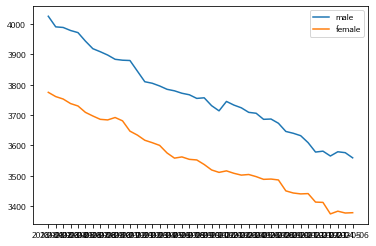

 19%|█▊        | 8/43 [00:03<00:14,  2.38it/s]

동홍동


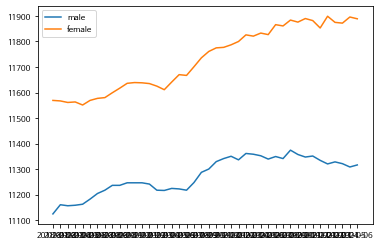

 21%|██        | 9/43 [00:03<00:14,  2.36it/s]

이도1동


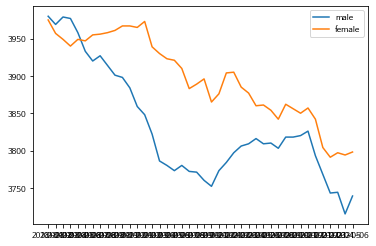

 23%|██▎       | 10/43 [00:04<00:12,  2.54it/s]

표선면


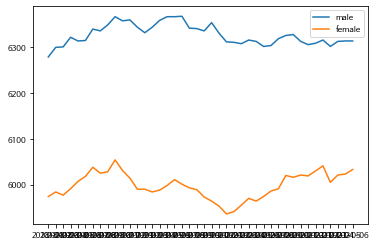

 26%|██▌       | 11/43 [00:04<00:11,  2.72it/s]

아라동


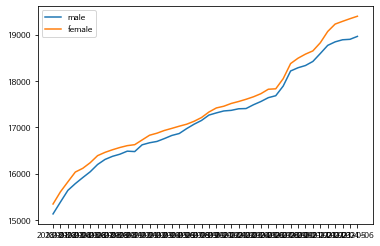

 28%|██▊       | 12/43 [00:04<00:10,  2.88it/s]

용담2동


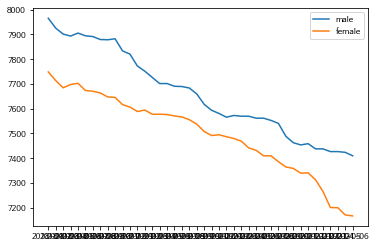

 30%|███       | 13/43 [00:05<00:11,  2.50it/s]

일도2동


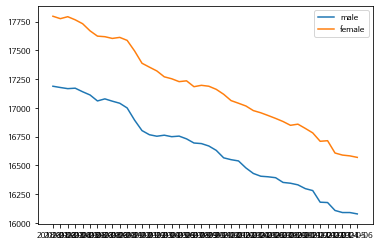

 33%|███▎      | 14/43 [00:05<00:11,  2.45it/s]

정방동


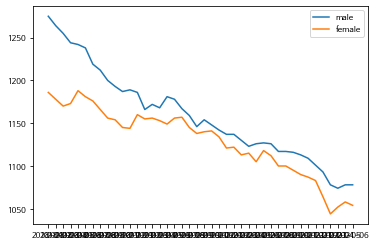

 35%|███▍      | 15/43 [00:06<00:10,  2.64it/s]

삼도2동


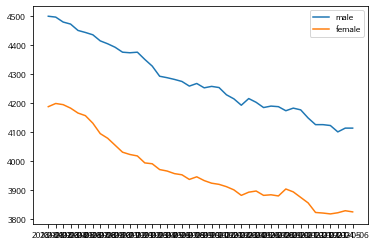

 37%|███▋      | 16/43 [00:06<00:10,  2.53it/s]

연동


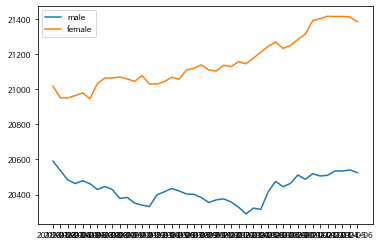

 40%|███▉      | 17/43 [00:06<00:09,  2.69it/s]

예래동


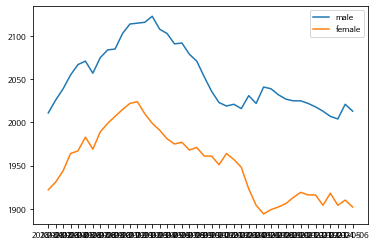

 42%|████▏     | 18/43 [00:07<00:08,  2.82it/s]

성산읍


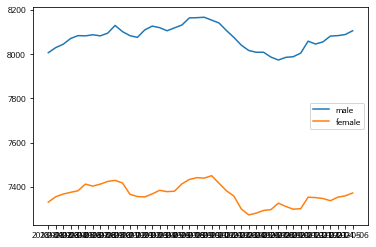

 44%|████▍     | 19/43 [00:07<00:08,  2.92it/s]

삼도1동


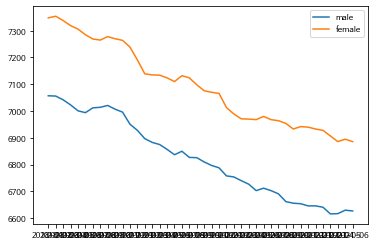

 47%|████▋     | 20/43 [00:07<00:08,  2.71it/s]

대륜동


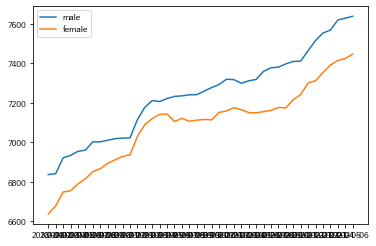

 49%|████▉     | 21/43 [00:08<00:07,  2.82it/s]

외도동


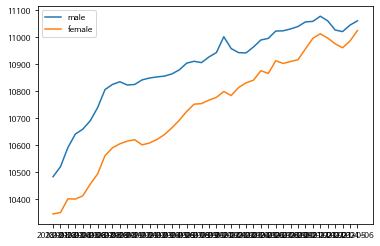

 51%|█████     | 22/43 [00:08<00:07,  2.64it/s]

추자면


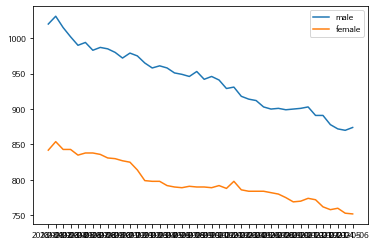

 53%|█████▎    | 23/43 [00:08<00:07,  2.77it/s]

중앙동


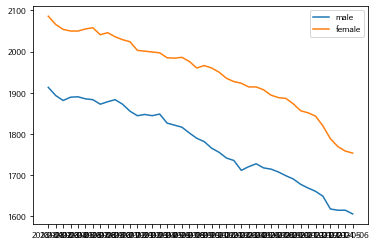

 56%|█████▌    | 24/43 [00:09<00:07,  2.62it/s]

천지동


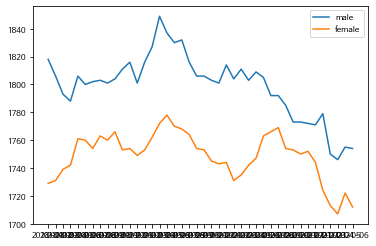

 58%|█████▊    | 25/43 [00:09<00:07,  2.52it/s]

남원읍


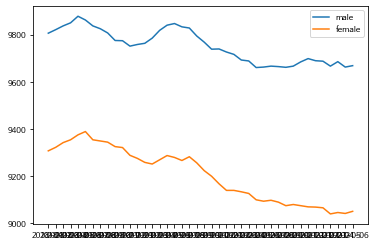

 60%|██████    | 26/43 [00:10<00:06,  2.73it/s]

대정읍


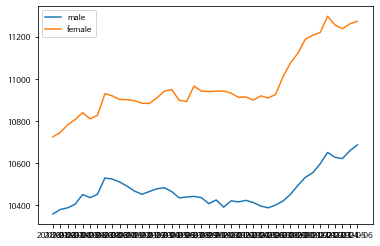

 63%|██████▎   | 27/43 [00:10<00:05,  2.91it/s]

건입동


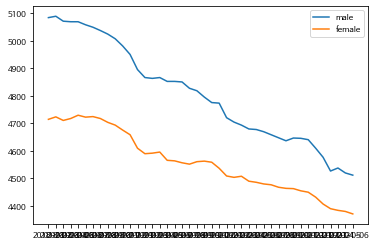

 65%|██████▌   | 28/43 [00:10<00:05,  2.69it/s]

한림읍


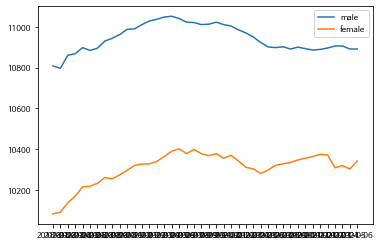

 67%|██████▋   | 29/43 [00:11<00:04,  2.84it/s]

이호동


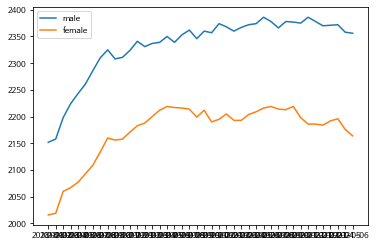

 70%|██████▉   | 30/43 [00:11<00:04,  2.64it/s]

조천읍


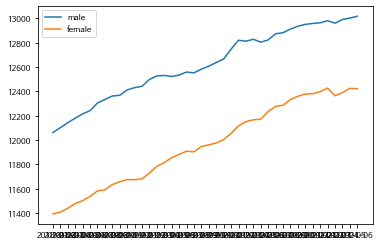

 72%|███████▏  | 31/43 [00:11<00:04,  2.52it/s]

송산동


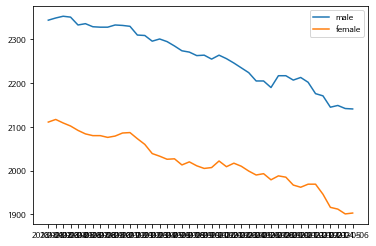

 74%|███████▍  | 32/43 [00:12<00:04,  2.68it/s]

오라동


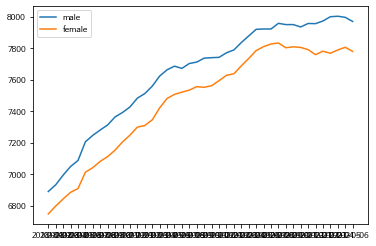

 77%|███████▋  | 33/43 [00:12<00:03,  2.57it/s]

중문동


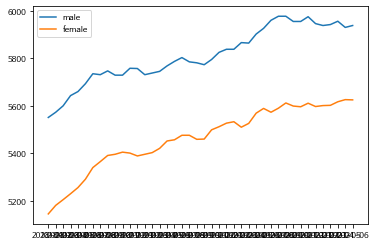

 79%|███████▉  | 34/43 [00:13<00:03,  2.73it/s]

영천동


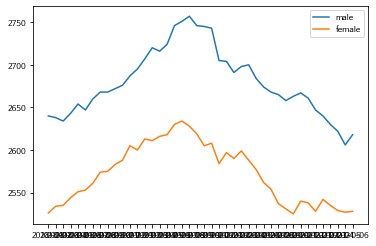

 81%|████████▏ | 35/43 [00:13<00:03,  2.63it/s]

이도2동


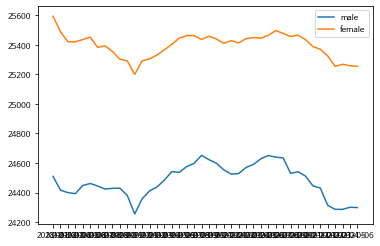

 84%|████████▎ | 36/43 [00:13<00:02,  2.52it/s]

삼양동


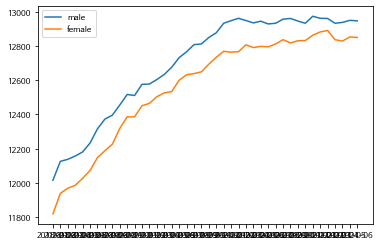

 86%|████████▌ | 37/43 [00:14<00:02,  2.46it/s]

도두동


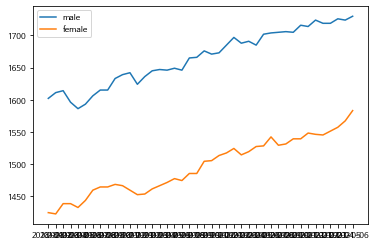

 88%|████████▊ | 38/43 [00:14<00:01,  2.63it/s]

안덕면


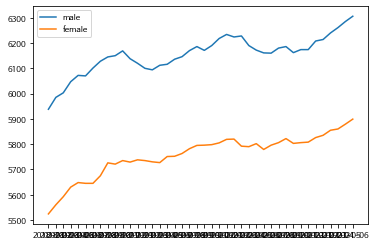

 91%|█████████ | 39/43 [00:15<00:01,  2.52it/s]

서홍동


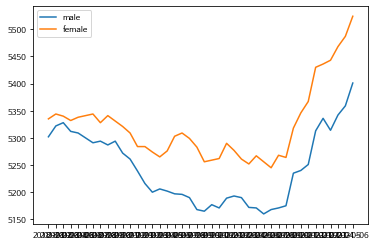

 93%|█████████▎| 40/43 [00:15<00:01,  2.45it/s]

일도1동


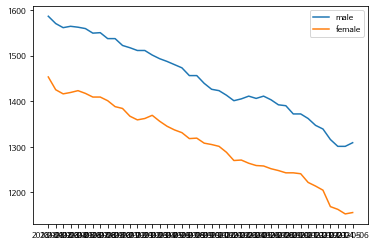

 95%|█████████▌| 41/43 [00:15<00:00,  2.64it/s]

봉개동


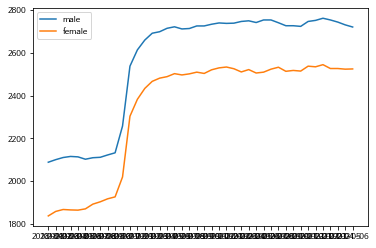

 98%|█████████▊| 42/43 [00:16<00:00,  2.78it/s]

화북동


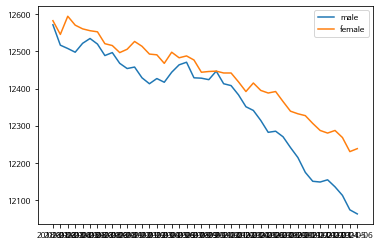

100%|██████████| 43/43 [00:16<00:00,  2.61it/s]


In [72]:
for i in tqdm(set(temp5['emd_nm'])):
    print(i)
    temp_5 = temp5[temp5['emd_nm'] == i]
    plt.plot(temp_5[temp_5['sex']=='남성']['year_month'], temp_5[temp_5['sex']=='남성']['resid_reg_pop'], label = 'male')
    plt.plot(temp_5[temp_5['sex']=='여성']['year_month'], temp_5[temp_5['sex']=='여성']['resid_reg_pop'], label = 'female')
    plt.legend()
    plt.show()

  0%|          | 0/43 [00:00<?, ?it/s]

애월읍


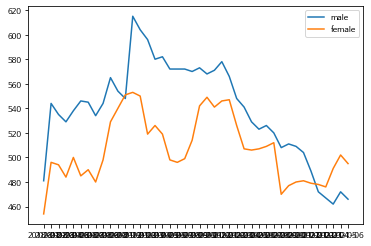

  2%|▏         | 1/43 [00:00<00:17,  2.44it/s]

효돈동


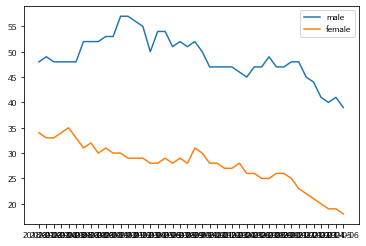

  5%|▍         | 2/43 [00:00<00:19,  2.11it/s]

우도면


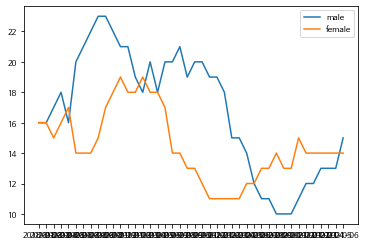

  7%|▋         | 3/43 [00:01<00:17,  2.25it/s]

한경면


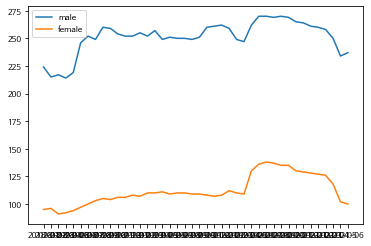

  9%|▉         | 4/43 [00:01<00:16,  2.33it/s]

구좌읍


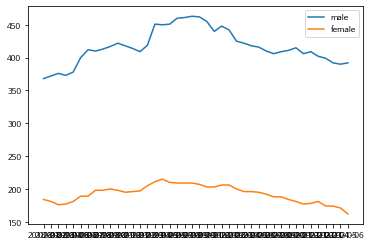

 12%|█▏        | 5/43 [00:02<00:16,  2.37it/s]

노형동


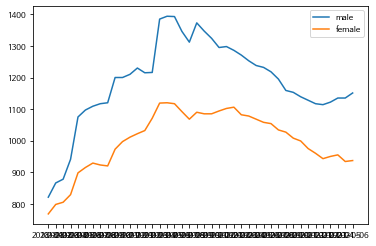

 14%|█▍        | 6/43 [00:02<00:15,  2.40it/s]

대천동


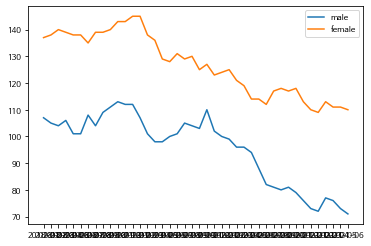

 16%|█▋        | 7/43 [00:02<00:14,  2.40it/s]

용담1동


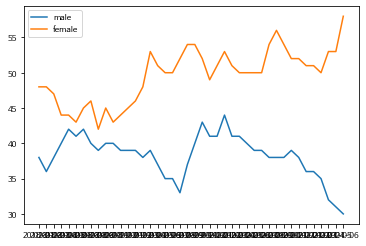

 19%|█▊        | 8/43 [00:03<00:13,  2.56it/s]

동홍동


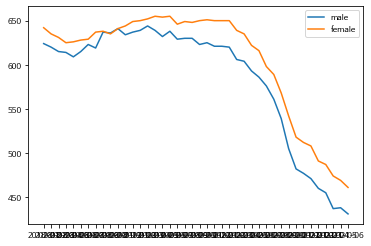

 21%|██        | 9/43 [00:03<00:12,  2.71it/s]

이도1동


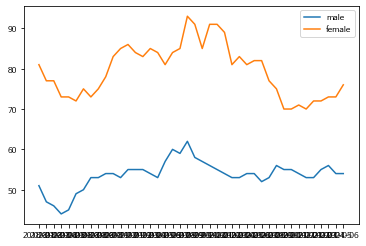

 23%|██▎       | 10/43 [00:03<00:11,  2.89it/s]

표선면


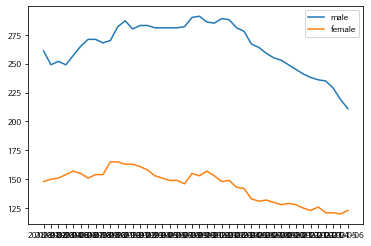

 26%|██▌       | 11/43 [00:04<00:11,  2.77it/s]

아라동


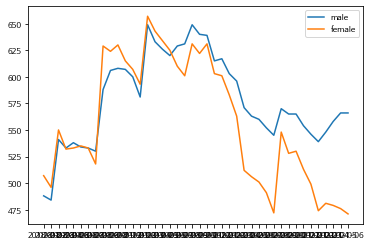

 28%|██▊       | 12/43 [00:04<00:11,  2.64it/s]

용담2동


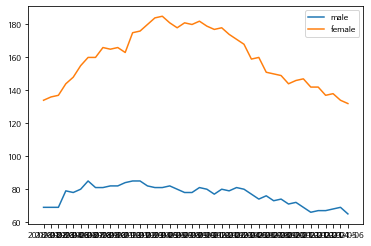

 30%|███       | 13/43 [00:05<00:12,  2.39it/s]

일도2동


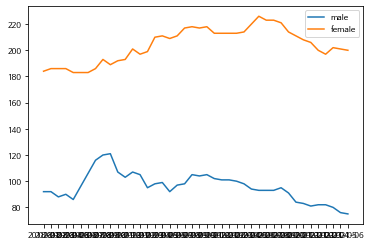

 33%|███▎      | 14/43 [00:05<00:12,  2.41it/s]

정방동


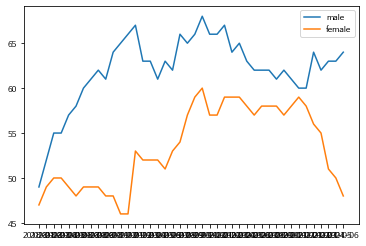

 35%|███▍      | 15/43 [00:05<00:10,  2.65it/s]

삼도2동


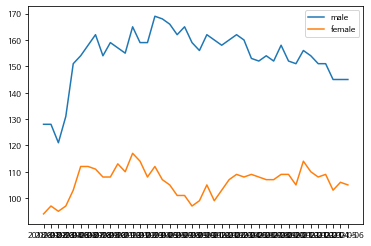

 37%|███▋      | 16/43 [00:06<00:10,  2.60it/s]

연동


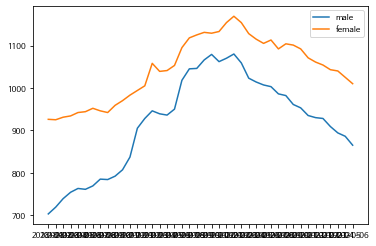

 40%|███▉      | 17/43 [00:06<00:09,  2.80it/s]

예래동


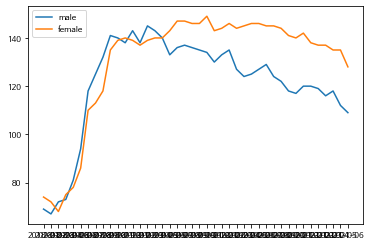

 42%|████▏     | 18/43 [00:06<00:08,  2.97it/s]

성산읍


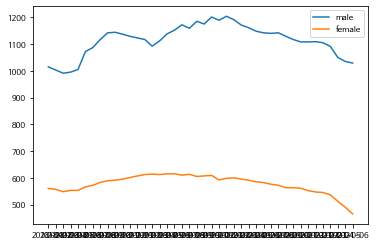

 44%|████▍     | 19/43 [00:07<00:08,  2.81it/s]

삼도1동


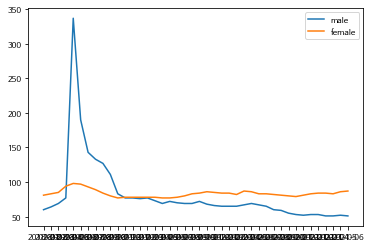

 47%|████▋     | 20/43 [00:07<00:08,  2.68it/s]

대륜동


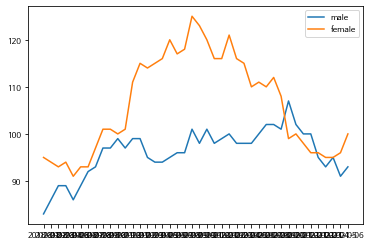

 49%|████▉     | 21/43 [00:08<00:07,  2.87it/s]

외도동


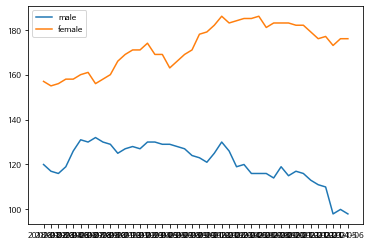

 51%|█████     | 22/43 [00:08<00:06,  3.02it/s]

추자면


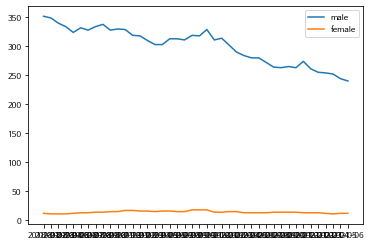

 53%|█████▎    | 23/43 [00:08<00:07,  2.82it/s]

중앙동


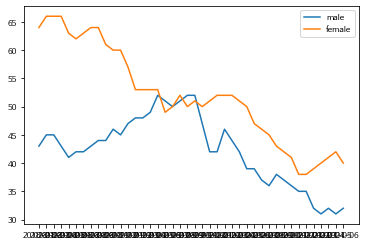

 56%|█████▌    | 24/43 [00:09<00:07,  2.49it/s]

천지동


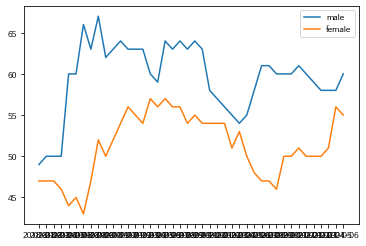

 58%|█████▊    | 25/43 [00:09<00:06,  2.70it/s]

남원읍


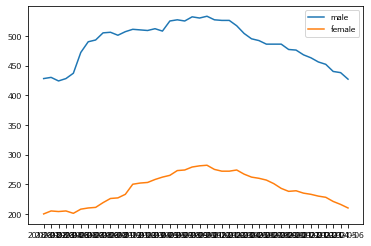

 60%|██████    | 26/43 [00:09<00:06,  2.64it/s]

대정읍


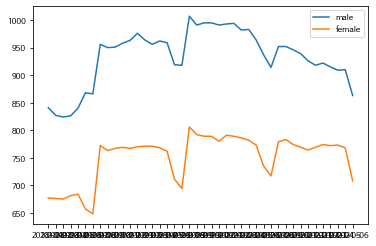

 63%|██████▎   | 27/43 [00:10<00:06,  2.58it/s]

건입동


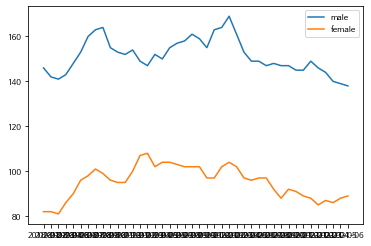

 65%|██████▌   | 28/43 [00:10<00:05,  2.77it/s]

한림읍


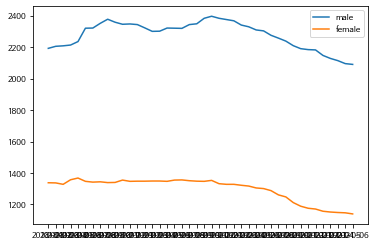

 67%|██████▋   | 29/43 [00:11<00:05,  2.67it/s]

이호동


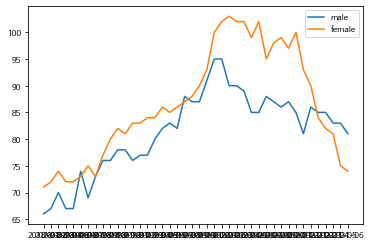

 70%|██████▉   | 30/43 [00:11<00:05,  2.58it/s]

조천읍


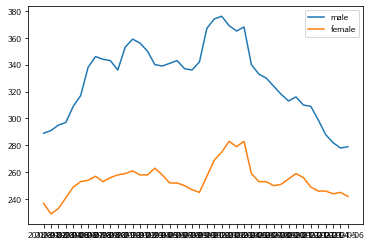

 72%|███████▏  | 31/43 [00:11<00:04,  2.53it/s]

송산동


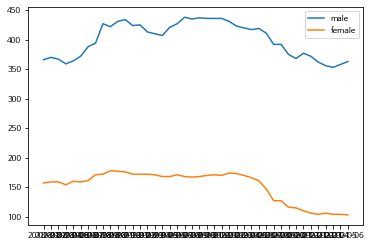

 74%|███████▍  | 32/43 [00:12<00:04,  2.52it/s]

오라동


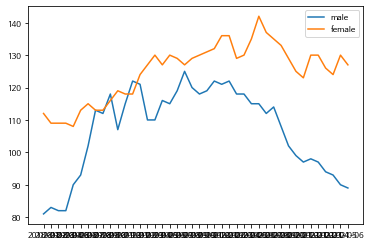

 77%|███████▋  | 33/43 [00:12<00:03,  2.53it/s]

중문동


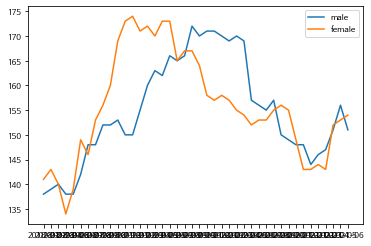

 79%|███████▉  | 34/43 [00:13<00:03,  2.51it/s]

영천동


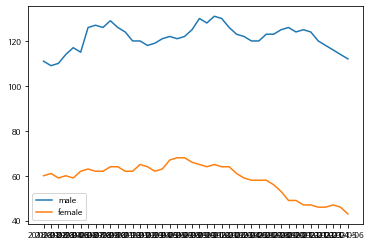

 81%|████████▏ | 35/43 [00:13<00:03,  2.47it/s]

이도2동


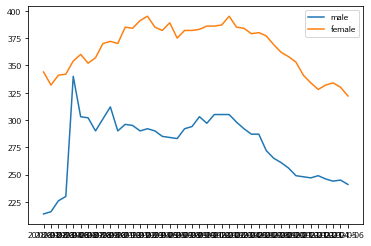

 84%|████████▎ | 36/43 [00:13<00:02,  2.42it/s]

삼양동


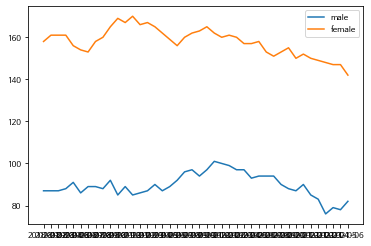

 86%|████████▌ | 37/43 [00:14<00:02,  2.60it/s]

도두동


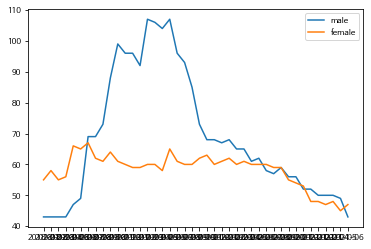

 88%|████████▊ | 38/43 [00:14<00:01,  2.51it/s]

안덕면


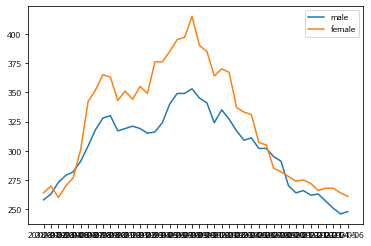

 91%|█████████ | 39/43 [00:15<00:01,  2.52it/s]

서홍동


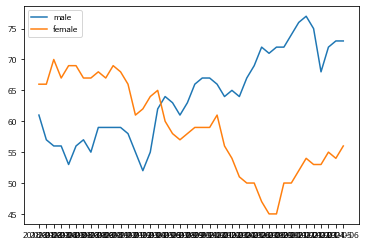

 93%|█████████▎| 40/43 [00:15<00:01,  2.53it/s]

일도1동


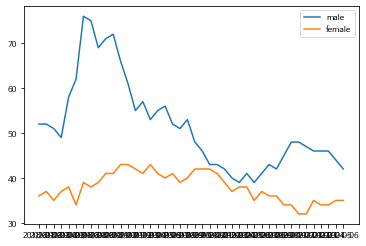

 95%|█████████▌| 41/43 [00:15<00:00,  2.76it/s]

봉개동


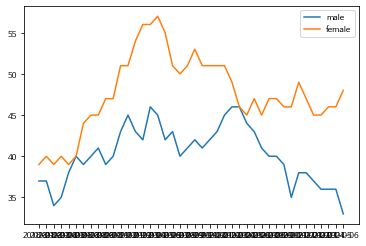

 98%|█████████▊| 42/43 [00:16<00:00,  2.94it/s]

화북동


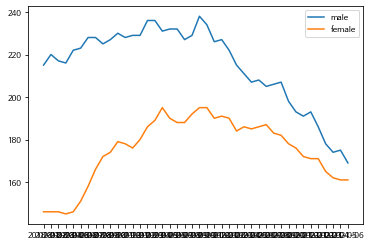

100%|██████████| 43/43 [00:16<00:00,  2.63it/s]


In [75]:
for i in tqdm(set(temp5['emd_nm'])):
    print(i)
    temp_5 = temp5[temp5['emd_nm'] == i]
    plt.plot(temp_5[temp_5['sex']=='남성']['year_month'], temp_5[temp_5['sex']=='남성']['foreign_pop'], label = 'male')
    plt.plot(temp_5[temp_5['sex']=='여성']['year_month'], temp_5[temp_5['sex']=='여성']['foreign_pop'], label = 'female')
    plt.legend()
    plt.show()

In [99]:
temp_m_resd = []
temp_f_resd = []
temp_m_for = []
temp_f_for = []
temp_m_total = []
temp_f_total = []

for i in tqdm(set(temp1['emd_nm'])):
    temp = temp1[temp1['emd_nm']==i]
    temp5_ = temp5[temp5['emd_nm']==i]
    temp_m = temp5_[temp5_['sex']=='남성']
    temp_f = temp5_[temp5_['sex']=='여성']
    temp_1 = pd.merge(temp[['year_month', 'em_g']], temp_m[['year_month', 'resid_reg_pop']], how='outer', on=['year_month']).sort_values(by=['year_month'], axis=0).reset_index(drop=True)
    temp_2 = pd.merge(temp[['year_month', 'em_g']], temp_f[['year_month', 'resid_reg_pop']], how='outer', on=['year_month']).sort_values(by=['year_month'], axis=0).reset_index(drop=True)
    temp_3 = pd.merge(temp[['year_month', 'em_g']], temp_m[['year_month', 'foreign_pop']], how='outer', on=['year_month']).sort_values(by=['year_month'], axis=0).reset_index(drop=True)
    temp_4 = pd.merge(temp[['year_month', 'em_g']], temp_f[['year_month', 'foreign_pop']], how='outer', on=['year_month']).sort_values(by=['year_month'], axis=0).reset_index(drop=True)
    temp_5 = pd.merge(temp[['year_month', 'em_g']], temp_m[['year_month', 'total_pop']], how='outer', on=['year_month']).sort_values(by=['year_month'], axis=0).reset_index(drop=True)
    temp_6 = pd.merge(temp[['year_month', 'em_g']], temp_f[['year_month', 'total_pop']], how='outer', on=['year_month']).sort_values(by=['year_month'], axis=0).reset_index(drop=True)
    temp_1_1 = temp_1[['em_g', 'resid_reg_pop']].corr()
    temp_2_1 = temp_2[['em_g', 'resid_reg_pop']].corr()
    temp_3_1 = temp_3[['em_g', 'foreign_pop']].corr()
    temp_4_1 = temp_4[['em_g', 'foreign_pop']].corr()
    temp_5_1 = temp_5[['em_g', 'total_pop']].corr()
    temp_6_1 = temp_6[['em_g', 'total_pop']].corr()
    
    temp_m_resd.append(temp_1_1.iloc[0,1])
    temp_f_resd.append(temp_2_1.iloc[0,1])
    temp_m_for.append(temp_3_1.iloc[0,1])
    temp_f_for.append(temp_4_1.iloc[0,1])
    temp_m_total.append(temp_5_1.iloc[0,1])
    temp_f_total.append(temp_6_1.iloc[0,1])
    
temp_corr_m_r = pd.concat([pd.Series(list(set(temp1['emd_nm']))), pd.Series(temp_m_resd)], axis=1)
temp_corr_f_r = pd.concat([pd.Series(list(set(temp1['emd_nm']))), pd.Series(temp_f_resd)], axis=1)
temp_corr_m_f = pd.concat([pd.Series(list(set(temp1['emd_nm']))), pd.Series(temp_m_for)], axis=1)
temp_corr_f_f = pd.concat([pd.Series(list(set(temp1['emd_nm']))), pd.Series(temp_f_for)], axis=1)
temp_corr_m_t = pd.concat([pd.Series(list(set(temp1['emd_nm']))), pd.Series(temp_m_total)], axis=1)
temp_corr_f_t = pd.concat([pd.Series(list(set(temp1['emd_nm']))), pd.Series(temp_f_total)], axis=1)

temp_corr_m_r.columns = ['emd_nm', 'corr_male_resid']
temp_corr_f_r.columns = ['emd_nm', 'corr_female_resid']
temp_corr_m_f.columns = ['emd_nm', 'corr_male_foreign']
temp_corr_f_f.columns = ['emd_nm', 'corr_female_foreign']
temp_corr_m_t.columns = ['emd_nm', 'corr_male_total']
temp_corr_f_t.columns = ['emd_nm', 'corr_female_total']



100%|██████████| 42/42 [00:01<00:00, 22.53it/s]


In [100]:
pd.merge(temp[['year_month', 'em_g']], temp_m[['year_month', 'resid_reg_pop']], how='outer', on=['year_month']).sort_values(by=['year_month'], axis=0).reset_index(drop=True)

,year_month,em_g,resid_reg_pop
0,2018-01,114334400,5085
1,2018-01,114334400,4026
2,2018-01,114334400,7965
3,2018-01,114334400,981
4,2018-01,114334400,3980
...,...,...,...
1801,2021-06,110750050,18962
1802,2021-06,110750050,6306
1803,2021-06,110750050,19122
1804,2021-06,110750050,2618


In [85]:
corr_pop = pd.merge(temp_corr_m_r, temp_corr_f_r, how='outer')
corr_pop = pd.merge(corr_pop, temp_corr_m_f, how='outer')
corr_pop = pd.merge(corr_pop, temp_corr_f_f, how='outer')
corr_pop = pd.merge(corr_pop, temp_corr_m_t, how='outer')
corr_pop = pd.merge(corr_pop, temp_corr_f_t, how='outer')
corr_pop

,emd_nm,corr_male_resid,corr_female_resid,corr_male_foreign,corr_female_foreign,corr_male_total,corr_female_total
0,애월읍,0.004797,0.007165,-0.016110,-0.016414,0.003603,0.006223
1,효돈동,0.001287,0.002776,-0.031072,-0.033101,-0.000760,0.001231
2,한경면,0.001292,0.002680,-0.034598,-0.036232,-0.000957,0.001025
3,구좌읍,0.001127,0.002351,-0.030806,-0.031939,-0.000875,0.000893
4,노형동,-0.002648,-0.003889,0.004875,0.001519,-0.002248,-0.003703
5,대천동,0.003313,0.004928,-0.007113,-0.009872,0.002747,0.004342
6,용담1동,-0.004487,-0.006652,0.013376,0.012003,-0.003479,-0.005920
7,동홍동,-0.000327,-0.000336,0.003537,0.000936,-0.000089,-0.000284
8,이도1동,-0.004096,-0.006160,0.017230,0.016626,-0.002852,-0.005239
9,표선면,0.005441,0.007499,-0.002845,-0.002309,0.005083,0.007170


In [97]:
temp_m_resd = []
temp_f_resd = []
temp_m_for = []
temp_f_for = []
temp_m_total = []
temp_f_total = []

for i in tqdm(set(temp1['emd_nm'])):
    temp = temp1[temp1['emd_nm']==i]
    temp5_ = temp5[temp5['emd_nm']==i]
    temp['em_g'] = temp['em_g'].shift(1)
    temp_m = temp5_[temp5_['sex']=='남성']
    temp_f = temp5_[temp5_['sex']=='여성']
    temp_1 = pd.merge(temp[['year_month', 'em_g']], temp_m[['year_month', 'resid_reg_pop']], how='outer').sort_values(by=['year_month'], axis=0).reset_index(drop=True)
    temp_2 = pd.merge(temp[['year_month', 'em_g']], temp_f[['year_month', 'resid_reg_pop']], how='outer').sort_values(by=['year_month'], axis=0).reset_index(drop=True)
    temp_3 = pd.merge(temp[['year_month', 'em_g']], temp_m[['year_month', 'foreign_pop']], how='outer').sort_values(by=['year_month'], axis=0).reset_index(drop=True)
    temp_4 = pd.merge(temp[['year_month', 'em_g']], temp_f[['year_month', 'foreign_pop']], how='outer').sort_values(by=['year_month'], axis=0).reset_index(drop=True)
    temp_5 = pd.merge(temp[['year_month', 'em_g']], temp_m[['year_month', 'total_pop']], how='outer').sort_values(by=['year_month'], axis=0).reset_index(drop=True)
    temp_6 = pd.merge(temp[['year_month', 'em_g']], temp_f[['year_month', 'total_pop']], how='outer').sort_values(by=['year_month'], axis=0).reset_index(drop=True)
    temp_1_1 = temp_1[['em_g', 'resid_reg_pop']].corr()
    temp_2_1 = temp_2[['em_g', 'resid_reg_pop']].corr()
    temp_3_1 = temp_3[['em_g', 'foreign_pop']].corr()
    temp_4_1 = temp_4[['em_g', 'foreign_pop']].corr()
    temp_5_1 = temp_5[['em_g', 'total_pop']].corr()
    temp_6_1 = temp_6[['em_g', 'total_pop']].corr()
    
    temp_m_resd.append(temp_1_1.iloc[0,1])
    temp_f_resd.append(temp_2_1.iloc[0,1])
    temp_m_for.append(temp_3_1.iloc[0,1])
    temp_f_for.append(temp_4_1.iloc[0,1])
    temp_m_total.append(temp_5_1.iloc[0,1])
    temp_f_total.append(temp_6_1.iloc[0,1])
    
temp_corr_m_r = pd.concat([pd.Series(list(set(temp1['emd_nm']))), pd.Series(temp_m_resd)], axis=1)
temp_corr_f_r = pd.concat([pd.Series(list(set(temp1['emd_nm']))), pd.Series(temp_f_resd)], axis=1)
temp_corr_m_f = pd.concat([pd.Series(list(set(temp1['emd_nm']))), pd.Series(temp_m_for)], axis=1)
temp_corr_f_f = pd.concat([pd.Series(list(set(temp1['emd_nm']))), pd.Series(temp_f_for)], axis=1)
temp_corr_m_t = pd.concat([pd.Series(list(set(temp1['emd_nm']))), pd.Series(temp_m_total)], axis=1)
temp_corr_f_t = pd.concat([pd.Series(list(set(temp1['emd_nm']))), pd.Series(temp_f_total)], axis=1)

temp_corr_m_r.columns = ['emd_nm', 'corr_male_resid']
temp_corr_f_r.columns = ['emd_nm', 'corr_female_resid']
temp_corr_m_f.columns = ['emd_nm', 'corr_male_foreign']
temp_corr_f_f.columns = ['emd_nm', 'corr_female_foreign']
temp_corr_m_t.columns = ['emd_nm', 'corr_male_total']
temp_corr_f_t.columns = ['emd_nm', 'corr_female_total']

corr_pop = pd.merge(temp_corr_m_r, temp_corr_f_r, how='outer')
corr_pop = pd.merge(corr_pop, temp_corr_m_f, how='outer')
corr_pop = pd.merge(corr_pop, temp_corr_f_f, how='outer')
corr_pop = pd.merge(corr_pop, temp_corr_m_t, how='outer')
corr_pop = pd.merge(corr_pop, temp_corr_f_t, how='outer')
corr_pop

  0%|          | 0/42 [00:00<?, ?it/s]/home/duhyeong.lee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
100%|██████████| 42/42 [00:01<00:00, 23.20it/s]


,emd_nm,corr_male_resid,corr_female_resid,corr_male_foreign,corr_female_foreign,corr_male_total,corr_female_total
0,애월읍,0.791963,0.859277,-0.780982,-0.443403,0.743838,0.842899
1,효돈동,-0.339479,-0.168364,-0.330220,-0.455464,-0.360464,-0.254776
2,한경면,0.476516,0.541579,-0.139606,0.324914,0.525775,0.712457
3,구좌읍,-0.367048,-0.284389,-0.762918,-0.665632,-0.539512,-0.464846
4,노형동,-0.492667,-0.472769,-0.089317,-0.156967,-0.474145,-0.487076
5,대천동,0.492830,0.532537,-0.507625,-0.616096,0.456976,0.507299
6,용담1동,0.791723,0.791775,0.418155,-0.496488,0.792951,0.796060
7,동홍동,0.261574,0.183954,0.032109,0.061896,0.297250,0.287303
8,이도1동,0.507945,0.701241,-0.111277,0.395536,0.521740,0.720437
9,표선면,-0.322060,-0.038607,-0.395802,-0.776953,-0.404335,-0.414691


In [98]:
temp_m_resd = []
temp_f_resd = []
temp_m_for = []
temp_f_for = []
temp_m_total = []
temp_f_total = []

for i in tqdm(set(temp1['emd_nm'])):
    temp = temp1[temp1['emd_nm']==i]
    temp['em_g'] = np.log(temp['em_g'])
    temp5_ = temp5[temp5['emd_nm']==i]
    temp_m = temp5_[temp5_['sex']=='남성']
    temp_f = temp5_[temp5_['sex']=='여성']
    temp_1 = pd.merge(temp[['year_month', 'em_g']], temp_m[['year_month', 'resid_reg_pop']], how='outer').sort_values(by=['year_month'], axis=0).reset_index(drop=True)
    temp_2 = pd.merge(temp[['year_month', 'em_g']], temp_f[['year_month', 'resid_reg_pop']], how='outer').sort_values(by=['year_month'], axis=0).reset_index(drop=True)
    temp_3 = pd.merge(temp[['year_month', 'em_g']], temp_m[['year_month', 'foreign_pop']], how='outer').sort_values(by=['year_month'], axis=0).reset_index(drop=True)
    temp_4 = pd.merge(temp[['year_month', 'em_g']], temp_f[['year_month', 'foreign_pop']], how='outer').sort_values(by=['year_month'], axis=0).reset_index(drop=True)
    temp_5 = pd.merge(temp[['year_month', 'em_g']], temp_m[['year_month', 'total_pop']], how='outer').sort_values(by=['year_month'], axis=0).reset_index(drop=True)
    temp_6 = pd.merge(temp[['year_month', 'em_g']], temp_f[['year_month', 'total_pop']], how='outer').sort_values(by=['year_month'], axis=0).reset_index(drop=True)
    temp_1_1 = temp_1[['em_g', 'resid_reg_pop']].corr()
    temp_2_1 = temp_2[['em_g', 'resid_reg_pop']].corr()
    temp_3_1 = temp_3[['em_g', 'foreign_pop']].corr()
    temp_4_1 = temp_4[['em_g', 'foreign_pop']].corr()
    temp_5_1 = temp_5[['em_g', 'total_pop']].corr()
    temp_6_1 = temp_6[['em_g', 'total_pop']].corr()
    
    temp_m_resd.append(temp_1_1.iloc[0,1])
    temp_f_resd.append(temp_2_1.iloc[0,1])
    temp_m_for.append(temp_3_1.iloc[0,1])
    temp_f_for.append(temp_4_1.iloc[0,1])
    temp_m_total.append(temp_5_1.iloc[0,1])
    temp_f_total.append(temp_6_1.iloc[0,1])
    
temp_corr_m_r = pd.concat([pd.Series(list(set(temp1['emd_nm']))), pd.Series(temp_m_resd)], axis=1)
temp_corr_f_r = pd.concat([pd.Series(list(set(temp1['emd_nm']))), pd.Series(temp_f_resd)], axis=1)
temp_corr_m_f = pd.concat([pd.Series(list(set(temp1['emd_nm']))), pd.Series(temp_m_for)], axis=1)
temp_corr_f_f = pd.concat([pd.Series(list(set(temp1['emd_nm']))), pd.Series(temp_f_for)], axis=1)
temp_corr_m_t = pd.concat([pd.Series(list(set(temp1['emd_nm']))), pd.Series(temp_m_total)], axis=1)
temp_corr_f_t = pd.concat([pd.Series(list(set(temp1['emd_nm']))), pd.Series(temp_f_total)], axis=1)

temp_corr_m_r.columns = ['emd_nm', 'corr_male_resid']
temp_corr_f_r.columns = ['emd_nm', 'corr_female_resid']
temp_corr_m_f.columns = ['emd_nm', 'corr_male_foreign']
temp_corr_f_f.columns = ['emd_nm', 'corr_female_foreign']
temp_corr_m_t.columns = ['emd_nm', 'corr_male_total']
temp_corr_f_t.columns = ['emd_nm', 'corr_female_total']

corr_pop = pd.merge(temp_corr_m_r, temp_corr_f_r, how='outer')
corr_pop = pd.merge(corr_pop, temp_corr_m_f, how='outer')
corr_pop = pd.merge(corr_pop, temp_corr_f_f, how='outer')
corr_pop = pd.merge(corr_pop, temp_corr_m_t, how='outer')
corr_pop = pd.merge(corr_pop, temp_corr_f_t, how='outer')
corr_pop

  0%|          | 0/42 [00:00<?, ?it/s]/home/duhyeong.lee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
100%|██████████| 42/42 [00:01<00:00, 22.81it/s]


,emd_nm,corr_male_resid,corr_female_resid,corr_male_foreign,corr_female_foreign,corr_male_total,corr_female_total
0,애월읍,0.798685,0.857453,-0.649304,-0.268528,0.756590,0.845407
1,효돈동,-0.219238,-0.041353,-0.207584,-0.320299,-0.232319,-0.115554
2,한경면,0.143657,0.409693,-0.109980,0.370543,0.117825,0.604044
3,구좌읍,-0.337301,-0.474583,-0.764781,-0.550159,-0.540368,-0.572085
4,노형동,-0.495550,-0.495469,-0.098508,-0.145707,-0.461784,-0.495030
5,대천동,0.416302,0.489625,-0.479826,-0.645429,0.381167,0.457520
6,용담1동,0.779399,0.765194,0.318998,-0.530542,0.778917,0.767037
7,동홍동,0.180772,0.169645,-0.023379,0.010932,0.163974,0.233329
8,이도1동,0.467257,0.678764,-0.130276,0.402427,0.477843,0.699172
9,표선면,-0.169421,-0.093409,-0.310581,-0.753951,-0.269558,-0.454888
